In [86]:
from collections import Counter
from pathlib import Path
import pickle

import torch
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import manifold
import dgl

from train import MultiSAGEModel, PinSAGECollator

In [2]:
datapath = Path('..', 'data')

In [3]:
with open(datapath / 'dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)

In [20]:
with open(datapath / 'cuisine.pkl', 'rb') as f:
    cuisine = pickle.load(f)

with open(datapath / 'ingredient.pkl', 'rb') as f:
    ingredient = pickle.load(f)

In [5]:
plt.style.use('ggplot')

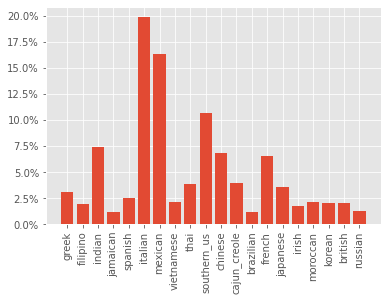

In [6]:
y_train_class_distribution = Counter(dataset['y_train'])

fig, ax = plt.subplots()
ax.set_xticks(range(20))
ax.set_xticklabels(list(dataset['cuisine_names'].values()), rotation=90)
bh = np.array(list(y_train_class_distribution.values()))
bh = bh / bh.sum()
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0))
ax.bar(y_train_class_distribution.keys(), bh)

fig.savefig('train_class_dist.pdf', bbox_inches='tight')

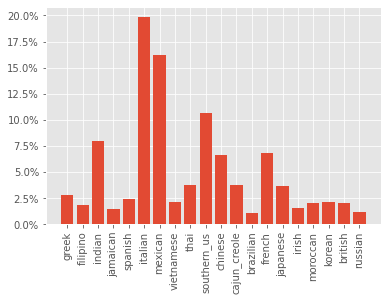

In [9]:
y_val_class_distribution = Counter(dataset['y_cls_val'])

fig, ax = plt.subplots()
ax.set_xticks(range(20))
ax.set_xticklabels(list(dataset['cuisine_names'].values()), rotation=90)
bh = np.array(list(y_val_class_distribution.values()))
bh = bh / bh.sum()
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0))
ax.bar(y_val_class_distribution.keys(), bh)

fig.savefig('val_class_dist.pdf', bbox_inches='tight')

In [68]:
graph = dgl.load_graphs(str(datapath / 'graph.bin'))[0][0]
graph

Graph(num_nodes={'cuisine': 20, 'ingredient': 6714, 'recipe': 23547},
      num_edges={('cuisine', 'c2r', 'recipe'): 23547, ('ingredient', 'i2r', 'recipe'): 253459, ('recipe', 'r2c', 'cuisine'): 23547, ('recipe', 'r2i', 'ingredient'): 253459},
      metagraph=[('cuisine', 'recipe', 'c2r'), ('recipe', 'cuisine', 'r2c'), ('recipe', 'ingredient', 'r2i'), ('ingredient', 'recipe', 'i2r')])

In [69]:
model = MultiSAGEModel(
    graph,
    'ingredient',
    'recipe',
    'cuisine',
    256,
    2,
    3,
)
model.load_state_dict(torch.load(
    Path('..', 'saved', '39_3model_state_dict.pt'),
    map_location=torch.device('cpu')
))

<All keys matched successfully>

In [71]:
model.ntype_params
model.c1type_params
model.c2type_params

Parameter containing:
tensor([[ 9.1290e-01, -1.3852e+00, -5.3355e-01,  ...,  5.7696e-01,
         -1.1863e+00, -1.1409e+00],
        [-1.1637e+00,  6.8734e-01,  7.4445e-02,  ..., -9.0055e-01,
         -7.1845e-01,  1.2985e+00],
        [-8.3562e-05,  6.6657e-02, -1.4546e+00,  ...,  1.7813e+00,
          8.5172e-01,  2.6017e-01],
        ...,
        [-5.8030e-01, -2.0700e+00,  1.2465e+00,  ...,  1.3240e-01,
         -4.2242e-01,  1.4073e+00],
        [-5.3727e-01, -4.5443e-01,  1.1070e-01,  ...,  8.7924e-01,
          1.5643e+00, -1.1665e+00],
        [-1.2408e+00, -1.7199e-01, -1.0305e+00,  ...,  7.4530e-01,
          7.8868e-01,  2.5044e+00]], requires_grad=True)

In [73]:
ingredient = model.ntype_params.detach().numpy().astype('float')

In [78]:
tsne = manifold.TSNE(
    n_components=2,
    perplexity=30)
trans_data = tsne.fit_transform(ingredient)

/tmp/ipykernel_18981/2115640965.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


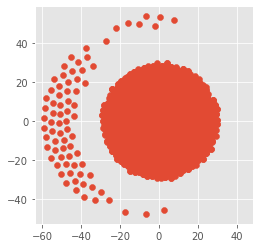

In [79]:
fig, ax = plt.subplots()
ax.scatter(trans_data[:,0], trans_data[:,1])
ax.axis('square')
fig.show()

In [80]:
recipe = model.c1type_params.detach().numpy().astype('float')

In [81]:
tsne = manifold.TSNE(
    n_components=2,
    perplexity=30)
trans_data = tsne.fit_transform(recipe)

/tmp/ipykernel_18981/2115640965.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


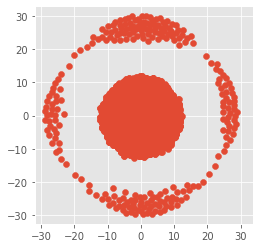

In [82]:
fig, ax = plt.subplots()
ax.scatter(trans_data[:,0], trans_data[:,1])
ax.axis('square')
fig.show()